
# Dealing with Imbalanced Datasets
    
## Problem Statement:
This dataset is composed of anonymized credit card transactions labeled as fraudulent
or genuine. The datasets contains transactions made by credit cards in September
2013 by european cardholders. This dataset presents transactions that occurred in two
days, where we have 492 frauds out of 284,807 transactions. The dataset is highly
unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation.
Features V1, V2, ... V28 are the principal components obtained with PCA, the only
features which have not been transformed with PCA are 'Time' and 'Amount'. Feature
'Time' contains the seconds elapsed between each transaction and the first transaction
in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used
for example-dependent cost-sensitive learning. Feature 'Class' is the response variable
and it takes value 1 in case of fraud and 0 otherwise.

## 1) Data Collection 
#### The credit card fraud transaction dataset is read into jupyter notebook and the first few rows of the dataset is observed. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/1000270448/Desktop/Certified Data Science Specialist Training/Assignment/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2) Data Preprocessing & Wrangling
####  There are 284807 rows and 31 columns with columns Time,V1, V2,...,V28, Amount and Class. 



In [2]:
#check number of rows and columns
df.shape

(284807, 31)

In [3]:
#check the columns in the dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### The summary statistics of the dataset is observed. For features V1, V2,...,V28, as the mean is close to 0 and the standard deviation is close to 1, it can be concluded that these features have been transformed with the standardization technique

In [4]:
#check summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### The dataset is checked for missing values and it is found that there are no missing values in the dataset

In [5]:
#check for missing values - no null values found
df.isnull().sum().max()

0

#### Check distribution of fraud and genuine
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 
- It is found that the classes are heavily imbalanced with 492(0.17%) fraud and 284315 (99.83%) genuine transactions 

In [6]:
#Check the classes of the response variable 'Class' - the dataset is highly imbalanced

print('There are frauds in', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The are genuine transactions in ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('There are',len(df[df['Class']==1]),'fraudulent transactions and',len(df[df['Class']==0]),'genuine transactions')

There are frauds in 0.17 % of the dataset
The are genuine transactions in  99.83 % of the dataset
There are 492 fraudulent transactions and 284315 genuine transactions


#### The response variable 'Class' is plotted to view the frequency of fraud and genuine transactions graphically  
It can be seen that the response variable 'Class' is highly imbalanced with more genuine transactions than fraud

Text(0.5, 1.0, 'Distribution of the classes of the credit card transactions dataset  \n (0: Genuine || 1: Fraud)')

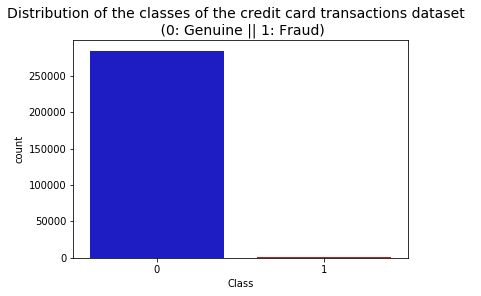

In [7]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Distribution of the classes of the credit card transactions dataset  \n (0: Genuine || 1: Fraud)', fontsize=14)

#### How does the amount of transaction vary for fraud and genuine?

- The feature 'Amount' is the transaction Amount
- Plotted the histograms for fraud and genuine, and checked their descriptive statistics
- As the histograms of fraud and genuine are skewed to the right, the median is a better measure of central tendency. 
- The median (50%) amount of transaction is 9.25 for fraud and 22 dollars for genuine. 
- Higher transaction amount is seen for genuine than fraud transactions.

In [8]:
Fraud=df[df['Class']==1]
Genuine=df[df['Class']==0]

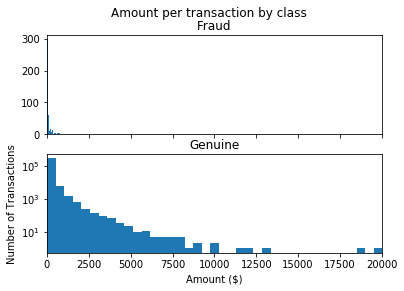

In [9]:
#Visual representation of the amount of transaction for fraud and genuine
#The histograms of fraud and genuine are skewed to the right
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Genuine.Amount, bins = bins)
ax2.set_title('Genuine')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [10]:
#check the transaction amount used in fraud transactions
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
#check the transaction amount used in genuine transactions
Genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

#### Do fraudulent and genuine transactions occur more frequently during a certain time frame ? 
-  Feature 'Time' contains the seconds elapsed between each transaction and the first transaction
in the dataset
- Fraudulent transactions occur most frequently between 7500-10000 seconds elapsed from the first transaction and occurs least frequently when less than 7500 seconds elapsed from the first transaction 
- Genuine transactions occur most frequently when less than 2500 seconds elapsed from the first transaction and occurs least frequently between 15000 to 17500 seconds elapsed from the first transaction 



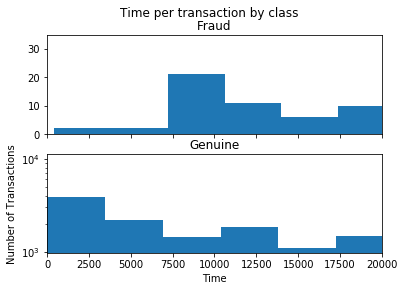

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time per transaction by class')
bins = 50
ax1.hist(Fraud.Time, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Genuine.Time, bins = bins)
ax2.set_title('Genuine')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

#### Histogram of each feature is plotted to observe the distribution of each feature. The histograms for features V1,V2,..V28 appear to be bell-shaped and symmetrical as they follow the standard normal distribution after standardization 


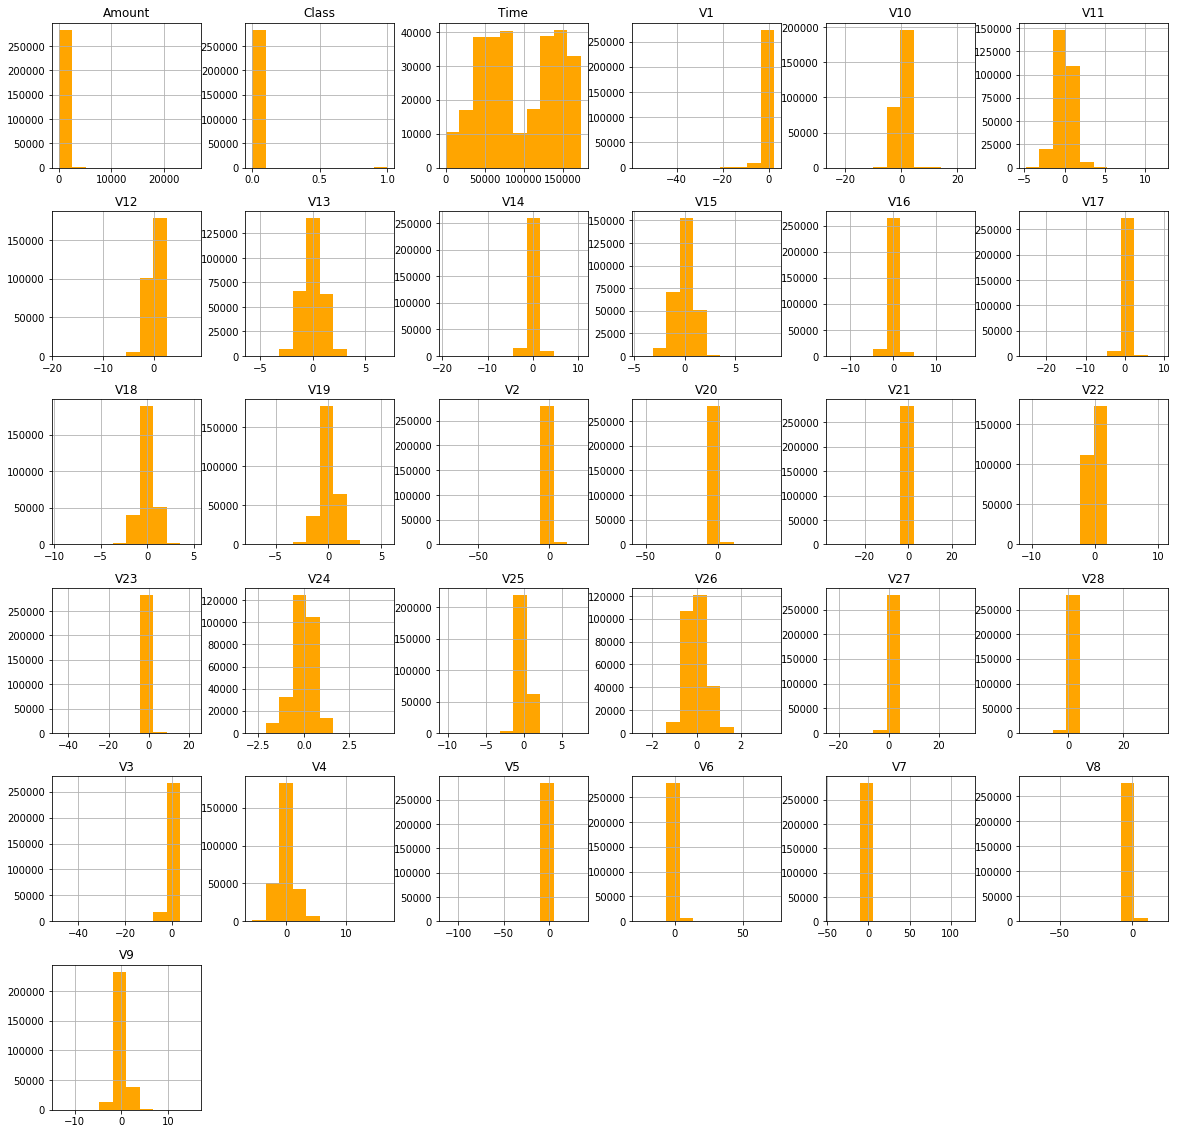

In [13]:
df.hist(color= 'orange',figsize=(20,20))
plt.show()

## 3) Feature scaling, combination of SMOTE oversampling and undersampling, multicollinearity checking, data visualisation with TSNE


### a) Feature scaling
The only features which have not been transformed/scaled with PCA are 'Time' and 'Amount', these two columns are scaled using Standard Scalar. After scaling, 'Time' and 'Amount' are denoted as 'scaled_time' and 'scaled_amount', respectively

In [2]:
#Scale 'Time' and 'Amount' using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))



In [3]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


#### After feature scaling, the correlation matrix is used to check the correlation coeffecient in the imbalanced dataset

- From the correlation matrix, most of the features did not show strong correlation with the response Class which may impact the performance of the model. 
- The feature correlation may not be obvious due to the class imbalance. 
- Hence,a combination of random undersampling and SMOTE oversampling will be done in the next section to deal with the imbalanced class dataset

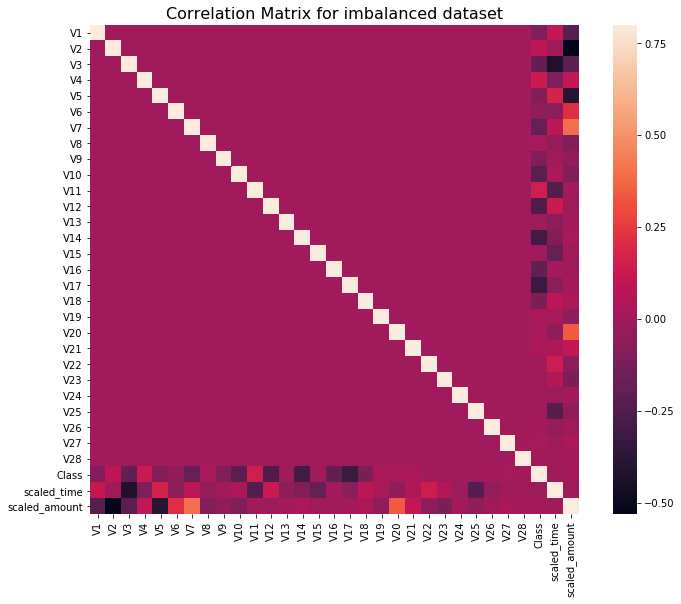

In [4]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.title('Correlation Matrix for imbalanced dataset', fontsize=16)
plt.show()

### b)  Combination of SMOTE oversampling of minority class and random undersampling of majority class to deal with class imbalance

- The dataset is imbalanced as majority of the dataset belongs to the class genuine.
- As the dataset does not represent all classes of data (fraud and genuine) equally, most machine learning techniques may ignore and perform poorly on the minority class (fraud)


- Split dataset into X (all features except response) and y (response 'Class')

In [5]:
X = df.drop('Class',axis=1) #all variables except response
y = df['Class'] #response variable

- Before performing the combination of undersampling and SMOTE oversampling, split data into train (80%) and test (20%). This is because undersampling and SMOTE oversampling will only be done on the train data

In [6]:
from sklearn.model_selection import train_test_split

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [7]:
train_data = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes in the train data
fraud = train_data[train_data.Class==1]
genuine = train_data[train_data.Class==0]

print('There are',len(fraud),'fraudulent transactions and',len(genuine),'genuine transactions in the train data')


There are 394 fraudulent transactions and 227451 genuine transactions in the train data


In [8]:
test_data = pd.concat([X_test, y_test], axis=1)

# separate minority and majority classes in the train data
fraud_test = test_data[test_data.Class==1]
genuine_test = test_data[test_data.Class==0]
print('There are',len(fraud_test),'fraudulent transactions and',len(genuine_test),'genuine transactions in the test data')

There are 98 fraudulent transactions and 56864 genuine transactions in the test data


- To deal with the imbalanced dataset a combination of two resampling techniques are combined: random undersampling and SMOTE (Synthetic Minority Oversampling Technique) oversampling
- Random undersampling involves randomly removing examples from the majority class (genuine)
- SMOTE oversampling involves adding more examples in the minority class (fraud). 
- SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and creating a new example at a point along that line.
- The ratio of fraud (minority) to genuine(majority) is reduced from 1:577 to 1:2 after the combined undersampling and SMOTE oversampling

In [9]:
# Combination of SMOTE oversampling of minority class and random undersampling of majority class 
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

# After resampling, we want a 1:2 ratio of minority(fraud) to majority (genuine) class 

#1)oversample the minority class with SMOTE to have 10% of the no. of examples of the majority class 

# No. of frauds increase from 394 to ~22000 frauds
over = SMOTE(sampling_strategy=0.1)

#2)random undersampling to reduce the no. of examples in the majority class to have 50% more than the minority class (about 44000).

# from 227451 to ~44000 genuine transactions
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Resample the dataset.
X_train_tr,y_train_tr = pipeline.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train_tr)
print(counter)
print('There is a', round(counter[1]/counter[1]),':',round(counter[0]/counter[1]),'ratio with',counter[1],'examples in the fraud (minority) class and',counter[0],'examples in the  genuine(majority) class after resampling')
print('Before resampling, there is a',round(len(fraud)/len(fraud)),':',round(len(genuine)/len(fraud)),'ratio of fraud (minority) to genuine(majority)')

Using TensorFlow backend.


Counter({0: 45490, 1: 22745})
There is a 1 : 2 ratio with 22745 examples in the fraud (minority) class and 45490 examples in the  genuine(majority) class after resampling
Before resampling, there is a 1 : 577 ratio of fraud (minority) to genuine(majority)


#### Correlation matrix to check the correlation coeffecient between all the features after resampling
From the correlation matrix, the feature correlation is much more obvious now compared to before resampling. 

In [10]:
X_train_tr=pd.DataFrame(X_train_tr)

X_train_tr.columns=X_train.columns

In [11]:
df_resampled=pd.concat([pd.DataFrame(X_train_tr), pd.DataFrame(y_train_tr)], axis=1)
df_resampled.columns=train_data.columns

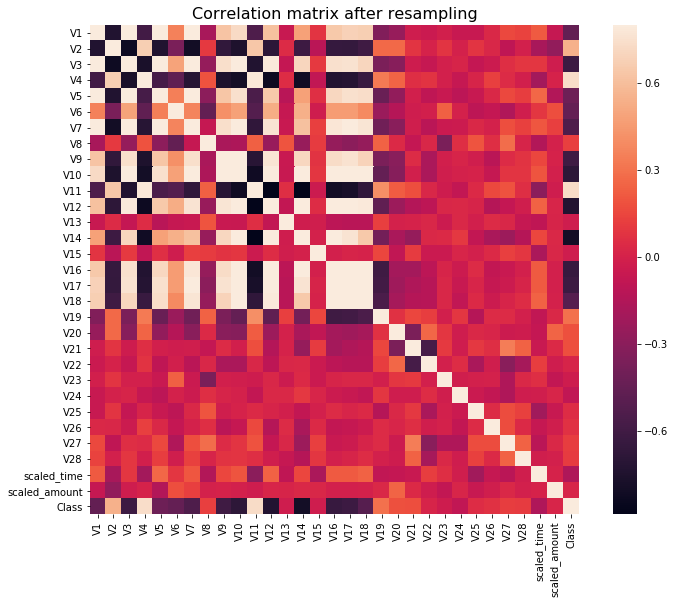

In [12]:
correlation_matrix = df_resampled.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.title('Correlation matrix after resampling', fontsize=16)
plt.show()

### c) Multicollinearity checking - Filtering out highly correlated features
- The features are checked for multicollinearity or high correlation among the features  
- Check whether the correlation coefficient between the features is more than 0.95
- As the correlation coefficient among the features is not more than 0.95, no feature is removed due to multicollinearity

In [13]:
# Calculate the correlation matrix 
corr_matrix = df_resampled.corr()
print(corr_matrix)

                     V1        V2        V3        V4        V5        V6  \
V1             1.000000 -0.740376  0.836375 -0.591617  0.820250  0.355698   
V2            -0.740376  1.000000 -0.821554  0.670239 -0.738756 -0.360855   
V3             0.836375 -0.821554  1.000000 -0.767811  0.819360  0.487159   
V4            -0.591617  0.670239 -0.767811  1.000000 -0.573966 -0.469843   
V5             0.820250 -0.738756  0.819360 -0.573966  1.000000  0.347461   
V6             0.355698 -0.360855  0.487159 -0.469843  0.347461  1.000000   
V7             0.850617 -0.804771  0.883256 -0.712608  0.834564  0.369071   
V8            -0.181457  0.106344 -0.256156  0.187627 -0.292986 -0.457523   
V9             0.624165 -0.667530  0.746437 -0.753132  0.633427  0.417220   
V10            0.721637 -0.750913  0.856486 -0.797882  0.748442  0.477850   
V11           -0.541180  0.639246 -0.737939  0.784359 -0.552138 -0.512150   
V12            0.614094 -0.686595  0.791191 -0.827769  0.643407  0.525258   

In [56]:
# Select upper triangle of correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)  

# no feature is removed due to multicollinearity

[]


### d) TSNE plot to visualize train data after combination of undersampling and SMOTE oversampling
- There is a 1 : 2 ratio with 22745 examples in the fraud (minority) class and 45490 examples in the  genuine(majority) class after combination of undersampling and SMOTE oversampling
- In the original dataset, there is a 1 : 577 ratio of fraud (minority) to genuine(majority)

In [57]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_resampled)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 68235 samples in 0.204s...
[t-SNE] Computed neighbors for 68235 samples in 220.341s...
[t-SNE] Computed conditional probabilities for sample 1000 / 68235
[t-SNE] Computed conditional probabilities for sample 2000 / 68235
[t-SNE] Computed conditional probabilities for sample 3000 / 68235
[t-SNE] Computed conditional probabilities for sample 4000 / 68235
[t-SNE] Computed conditional probabilities for sample 5000 / 68235
[t-SNE] Computed conditional probabilities for sample 6000 / 68235
[t-SNE] Computed conditional probabilities for sample 7000 / 68235
[t-SNE] Computed conditional probabilities for sample 8000 / 68235
[t-SNE] Computed conditional probabilities for sample 9000 / 68235
[t-SNE] Computed conditional probabilities for sample 10000 / 68235
[t-SNE] Computed conditional probabilities for sample 11000 / 68235
[t-SNE] Computed conditional probabilities for sample 12000 / 68235
[t-SNE] Computed conditional probabilities for 

#### A TSNE plot of the dataset is created, showing the oversampled minority class fraud (Class "1" ) and the undersampled majority class genuine (Class "0").
- There is only a slight overlap of the minority and majority classes in the train data after the combination of SMOTE oversampling and undersampling which will enable the machine learning algorithms to provide a better classification of fraudulent and genuine transactions

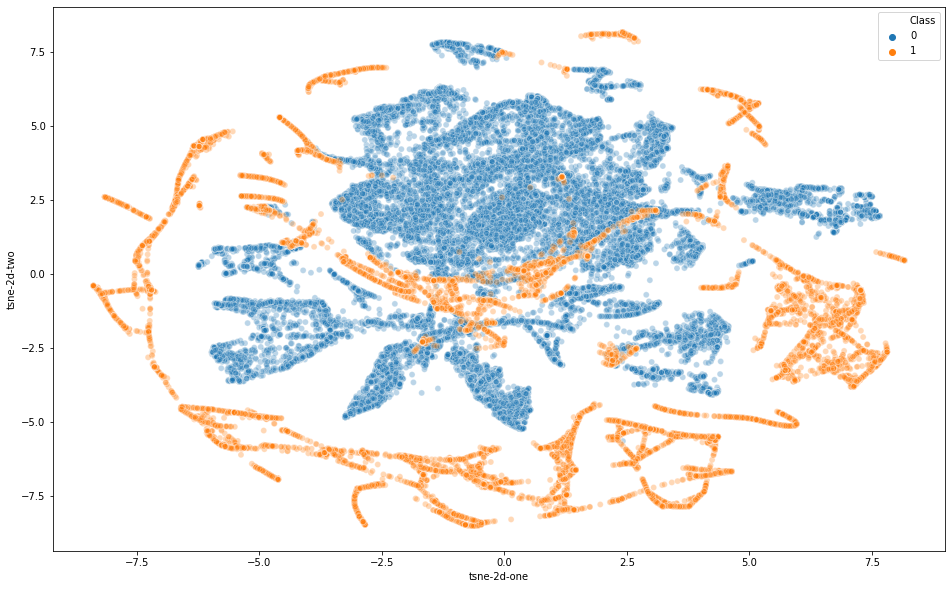

In [58]:
df_resampled['tsne-2d-one'] = tsne_results[:,0]
df_resampled['tsne-2d-two'] = tsne_results[:,1]
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Class",
    data=df_resampled,
    legend="full",
    alpha=0.3
    )

### 4) Model training and evaluation

### Model training and testing is done for 5 algorthms : Logistic regression, SVM, XGBoost, Naive bayes, Neural network


In [18]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#--------------Logistic regression -------------------#
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

# fit the model on the train set
model1.fit(X_train_tr,y_train_tr)

#perform prediction on the test set 
y_pred_lr=model1.predict(X_test)

#--------------SVM-------------------#

#Import svm model
from sklearn import svm

#Create a svm Classifier
model2 = svm.SVC() 

#Train the model using the training sets
model2.fit(X_train_tr,y_train_tr)

#Predict the response for test dataset
y_pred_svm = model2.predict(X_test)

#--------------XGBoost-------------------#

#Import XGBoost model
from xgboost import XGBClassifier

#Create a XGBoost Classifier
model3 = XGBClassifier()

#Train the model using the training sets
model3.fit(X_train_tr, y_train_tr)

#Predict the response for test dataset
y_pred_xgb = model3.predict(X_test)

#--------------naive bayes------------------#
#Import naive bayes model
from sklearn.naive_bayes import GaussianNB

#Create a naive bayes Classifier
model4 = GaussianNB()

#Train the model using the training sets
model4.fit(X_train_tr,y_train_tr)

#Predict the response for test dataset
y_pred_nb = model4.predict(X_test)
         
#---------------neural network------------------#
#Import neural network model
from sklearn.neural_network import MLPClassifier

#Create a neural network Classifier
model5= MLPClassifier(hidden_layer_sizes=(30,30,30))
         
#Predict the response for test dataset
model5.fit(X_train_tr, y_train_tr)         

#Predict the response for test dataset
y_pred_nn = model5.predict(X_test)

#### Model evaluation using confusion matrix
- The dimension of this matrix is 2*2 because this model is binary classification with two classes 0 (genuine) and 1 (fraud). 
- Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. 


In [19]:
#Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions
from sklearn import metrics
cnf_matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr)
cnf_matrix_svm = metrics.confusion_matrix(y_test, y_pred_svm)
cnf_matrix_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)
cnf_matrix_nb = metrics.confusion_matrix(y_test, y_pred_nb)
cnf_matrix_nn = metrics.confusion_matrix(y_test, y_pred_nn)

print('LR confusion matrix:')
print(cnf_matrix_lr)
print('SVM confusion matrix:')
print(cnf_matrix_svm)
print('XGB confusion matrix:')
print(cnf_matrix_xgb)
print('Naive bayes confusion matrix:')
print(cnf_matrix_nb)
print('Neural network confusion matrix:')
print(cnf_matrix_nn)

LR confusion matrix:
[[56229   635]
 [    8    90]]
SVM confusion matrix:
[[56688   176]
 [   18    80]]
XGB confusion matrix:
[[56575   289]
 [   11    87]]
Naive bayes confusion matrix:
[[55529  1335]
 [   14    84]]
Neural network confusion matrix:
[[56743   121]
 [   13    85]]


- There are 98 fraudulent transactions and 56864 genuine transactions in the test data. 
- From the confusion matrices, most of the fraudulent and genuine transactions are predicted correctly by the algorithms. 
- Neural network has the highest amount of genuine predicted as genuine at 56743 transactions
- Logistic regression has the highest amount of fraud predicted as fraud at 90 transactions


### 5)  Ensemble learning (Max voting)
- Max-voting is used to combine the predictions from the five machine learning algorithms (Logistic regression, SVM, XGBoost, Naive bayes, Neural network). 


In [22]:
from sklearn.ensemble import VotingClassifier
mvmodel = VotingClassifier(estimators=[('lr', model1), ('svm', model2),('xgb', model3),('nb', model4),('nn', model5)], voting='hard')
mvmodel.fit(X_train_tr,y_train_tr)
y_pred_mv=mvmodel.predict(X_test)

In [23]:
cnf_matrix_mv = metrics.confusion_matrix(y_test, y_pred_mv)

print('Confusion matrix for max voting:')
print(cnf_matrix_mv)

Confusion matrix for max voting:
[[56782    82]
 [   11    87]]


#### Visualizing Confusion Matrix of Max Voting using Heatmap
From the confusion matrix, true positive and true negative are the correct predictions, and false positive and false negative are the incorrect predictions.

Text(0.5, 15.0, 'Predicted label')

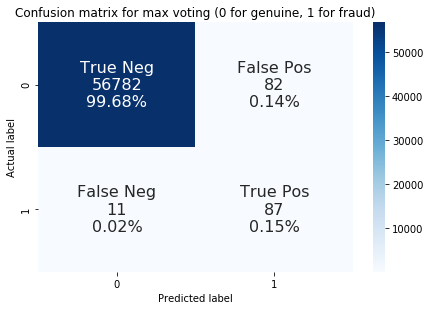

In [25]:
#pip install --user matplotlib==3.1.0

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix_mv.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_mv.flatten()/np.sum(cnf_matrix_mv)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix_mv, annot=labels, fmt='', cmap='Blues',annot_kws={"fontsize":16})
plt.tight_layout()
plt.title('Confusion matrix for max voting (0 for genuine, 1 for fraud)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


From the confusion matrix, 56782 (out of 56864) genuine and 87 (out of 98) fraudulent transactions are predicted correctly using max voting. 

#### Model evaluation with accuracy, precision, recall and F1 score

In [29]:
#Accuracy: fraction of samples predicted correctly
#Fraction of genuine predicted as genuine and fraud predicted as fraud 
# (TP+TN)/(TP+TN+FP+FN)
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_mv)*100,2)) 

# Precision: fraction of predicted positives events that are actually positive 
# Fraction of actual frauds in all predicted frauds
# TP/ (TP+FP) 
print("Precision:",round(metrics.precision_score(y_test,y_pred_mv)*100,2)) 

# Recall: proportion of actual positives that was identified correctly
#fraction of actual frauds that are predicted correctly
# TP/ (TP+FN)
print("Recall:",round(metrics.recall_score(y_test,y_pred_mv)*100,2))

# F1 Score is the weighted average of Precision and Recall.
print("F1 score:",round(metrics.f1_score(y_test,y_pred_mv)*100,2))

Accuracy: 99.84
Precision: 51.48
Recall: 88.78
F1 score: 65.17


From max voting,
- Accuracy: The prediction accuracy is high at is 99.84% 
- Precision: Out of all fraud predictions, the percentage of correct fraud prediction is 51.48%. 
- Recall: Percentage of actual frauds that are predicted correctly as fraud is 88.78%
- F1 score is the weighted average of Precision and Recall. It is usually more useful than accuracy, especially if class distribution is unequal. The F1 score is high at 65.17%. 
